---
layout: exercises
chapter: 5
chapter-title: Support Vector Machines
permalink: /ml-book/chapter5/exercises.html
---

## Exercise 1

The fundamental idea behind Support Vector Machines is to create a boundary (margin) between classification classes which is defined by the support vectors. The goal is to limit the number of margin violations. In regression, the goal is to have the margin encompass as many samples as possible.

## Exercise 2

A support vector defines the "edges" of the street (margin) produced by the SVM. They're all that matter when creating the SVM.

## Exercise 3

It's important to scale the inputs when using an SVM because if all the inputs all the same scale it will be easier to produce a boundary with a larger margin. 

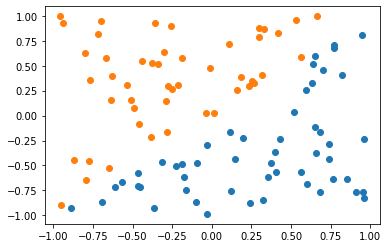

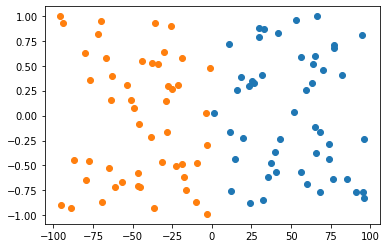

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = 2*(np.random.random(100) - 0.5)
y = 2*(np.random.random(100) - 0.5)
plt.scatter(x[y<x], y[y<x])
plt.scatter(x[y>x], y[y>x])
x = x*100
plt.figure()
plt.scatter(x[y<x], y[y<x])
plt.scatter(x[y>x], y[y>x])

Hopefully, this is visible from above. In the second figure, the y value is insignificant because it is vastly outscaled by x. Clearly, when they are of equal scales both x and y are significant in determining a boundary. 

## Exercise 4

Yes, `LinearSVC` can output a confidence score with the `decision_function` method. This could be turned into probability by scaling to the [0,1] [per](https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html#sphx-glr-auto-examples-calibration-plot-calibration-curve-py):

>Since SVC does not output probabilities by default, we naively scale the output of the decision_function into [0, 1] by applying min-max scaling.

## Exercise 5

I think you'd want to use the primal solution if the number of samples greatly outnumbers the number of the features.

## Exercise 6

If you're underfitting you should increase gamma because it will reduce the influence of individual samples (encouraging a tighter more irregular boundary around each). C is inversely proportional to regularization. So, if you're underfitting and want less regularization you should increase C, as well.

## Exercise 7

See the QP formulation of the SVM problem in 5-5.

## Exercise 8

Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris["data"], iris["target"]

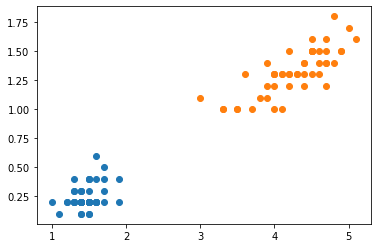

In [3]:
plt.scatter(X[y==0][:, [2]], X[y==0][:, [3]])
plt.scatter(X[y==1][:, [2]], X[y==1][:, [3]])

In [4]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = X[y <= 1][:, [2, 3]]
y = y[y <= 1]

lsvc_clf = make_pipeline(StandardScaler(), LinearSVC())
lsvc_clf.fit(X, y)
print(lsvc_clf.named_steps['linearsvc'].__dict__)

{'dual': True, 'tol': 0.0001, 'C': 1.0, 'multi_class': 'ovr', 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'verbose': 0, 'random_state': None, 'max_iter': 1000, 'penalty': 'l2', 'loss': 'squared_hinge', 'n_features_in_': 2, 'classes_': array([0, 1]), 'coef_': array([[0.90014856, 0.83424083]]), 'intercept_': array([0.2607337]), 'n_iter_': 30}


{'dual': True, 'tol': 0.0001, 'C': 1.0, 'multi_class': 'ovr', 'fit_intercept': True, 'intercept_scaling': 1, 'class_weight': None, 'verbose': 0, 'random_state': None, 'max_iter': 1000, 'penalty': 'l2', 'loss': 'squared_hinge', 'n_features_in_': 2, 'classes_': array([0, 1]), 'coef_': array([[0.90015964, 0.83424693]]), 'intercept_': array([0.26072637]), 'n_iter_': 32}


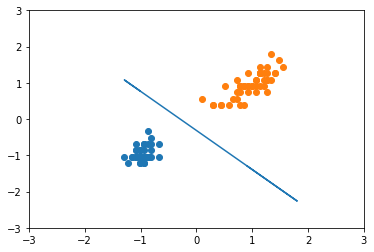

In [5]:
X_scl = StandardScaler().fit_transform(X)
clf = LinearSVC()
clf.fit(X_scl, y)
plt.scatter(X_scl[y == 0][:, 0], X_scl[y == 0][:, 1])
plt.scatter(X_scl[y == 1][:, 0], X_scl[y == 1][:, 1])
a = -clf.coef_[0][0] / clf.coef_[0][1]
b = -clf.intercept_[0] / clf.coef_[0][1]
y_line = a * X_scl + b
plt.plot(X_scl.flatten(), y_line.flatten())
plt.xlim(-3, 3)
plt.ylim(-3, 3)

print(clf.__dict__)
# https://stackoverflow.com/questions/23794277/extract-decision-boundary-with-scikit-learn-linear-svm

{'decision_function_shape': 'ovr', 'break_ties': False, 'kernel': 'rbf', 'degree': 3, 'gamma': 0.1, 'coef0': 0.0, 'tol': 0.001, 'C': 100, 'nu': 0.0, 'epsilon': 0.0, 'shrinking': True, 'probability': False, 'cache_size': 200, 'class_weight': None, 'verbose': False, 'max_iter': -1, 'random_state': None, '_sparse': False, 'n_features_in_': 2, 'class_weight_': array([1., 1.]), 'classes_': array([0, 1]), '_gamma': 0.1, 'support_': array([43, 98], dtype=int32), 'support_vectors_': array([[-0.87430856, -0.3307724 ],
       [ 0.09637501,  0.55840072]]), '_n_support': array([1, 1], dtype=int32), 'dual_coef_': array([[-6.28525403,  6.28525403]]), 'intercept_': array([-0.]), '_probA': array([], dtype=float64), '_probB': array([], dtype=float64), 'fit_status_': 0, 'shape_fit_': (100, 2), '_intercept_': array([0.]), '_dual_coef_': array([[ 6.28525403, -6.28525403]])}


<module 'matplotlib.pyplot' from '/Users/riley/PycharmProjects/ML/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

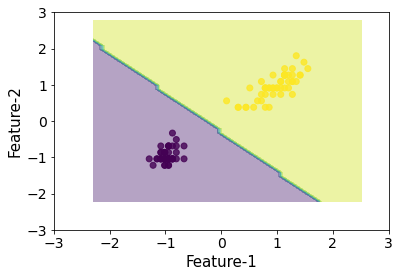

In [6]:
from sklearn.svm import SVC

clf = SVC(kernel="rbf", C=100, gamma=0.1)


# From here: https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Utilities/ML-Python-utils.py
def plot_decision_boundaries(X, y, model, **model_params):
    """
    Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    Arguments:
            X: Feature data as a NumPy-type array.
            y: Label data as a NumPy-type array.
            model_class: A Scikit-learn ML estimator class 
            e.g. GaussianNB (imported from sklearn.naive_bayes) or
            LogisticRegression (imported from sklearn.linear_model)
            **model_params: Model parameters to be passed on to the ML estimator
    
    Typical code example:
            plt.figure()
            plt.title("KNN decision boundary with neighbros: 5",fontsize=16)
            plot_decision_boundaries(X_train,y_train,KNeighborsClassifier,n_neighbors=5)
            plt.show()
    """
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print("Coercing input data to NumPy arrays failed")
    # Reduces to the first two columns of data
    reduced_data = X[:, :2]
    # Instantiate the model object
#     model = model_class(**model_params)
    # Fits the model with the reduced data
    model.fit(reduced_data, y)
    print(model.__dict__)
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    # Meshgrid creation
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predictions to obtain the classification results
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    return plt
plot_decision_boundaries(X_scl, y, clf)

That looks about the same.

{'loss': 'hinge', 'penalty': 'l2', 'learning_rate': 'optimal', 'epsilon': 0.1, 'alpha': 0.01, 'C': 1.0, 'l1_ratio': 0.2, 'fit_intercept': True, 'shuffle': True, 'random_state': None, 'verbose': 0, 'eta0': 0.0, 'power_t': 0.5, 'early_stopping': False, 'validation_fraction': 0.1, 'n_iter_no_change': 5, 'warm_start': False, 'average': False, 'max_iter': 1000, 'tol': 0.001, 'class_weight': None, 'n_jobs': None, 'coef_': array([[1.23946101, 1.06755864]]), 'intercept_': array([0.36044005]), 't_': 701.0, 'n_features_in_': 2, 'classes_': array([0, 1]), '_expanded_class_weight': array([1., 1.]), 'loss_function_': <sklearn.linear_model._sgd_fast.Hinge object at 0x1204576d0>, 'n_iter_': 7}


<module 'matplotlib.pyplot' from '/Users/riley/PycharmProjects/ML/venv/lib/python3.8/site-packages/matplotlib/pyplot.py'>

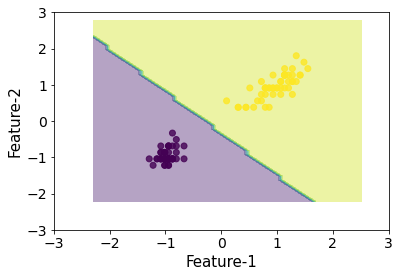

In [7]:
from sklearn.linear_model import SGDClassifier

# L1 penalty only
clf = SGDClassifier(l1_ratio=0.2, alpha=0.01)
plot_decision_boundaries(X_scl, y, clf)

That looks pretty close.

## Exercise 9

Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all 10 digits. You may want to tune the hyperparameters using small validation sets to speed up the process. What accuracy can you reach?

In [8]:
# Code from Chapter 3 Exercises
from sklearn.datasets import fetch_openml
import numpy as np

# MNIST changed to https://www.openml.org/d/554
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
# Do this to follow along with Geron
def sort_by_target(mnist):
    reorder_train = np.array(
        sorted([(target, i) for i, target in enumerate(mnist.target[:60000])])
    )[:, 1]
    reorder_test = np.array(
        sorted([(target, i) for i, target in enumerate(mnist.target[60000:])])
    )[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]


mnist.target = mnist.target.astype(np.int8)
sort_by_target(mnist)

X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)
X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:]
# Shuffling
shuf_order = np.random.permutation(len(y_train))
X_train, y_train = X_train[shuf_order, :], y_train[shuf_order]

(70000, 784) (70000,)


In [9]:
# Let's scale (minmax)
X_train_scl, X_test_scl = X_train / 255, X_test / 255

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc_clf = SVC()

cross_val_score(svc_clf, X_train_scl, (y_train == 0).astype(int), cv=5, scoring="accuracy", verbose=4, n_jobs=4)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:  2.1min remaining:  3.1min
[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:  2.8min finished


array([0.99783333, 0.99708333, 0.99758333, 0.99783333, 0.9975    ])

In [19]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

params = {"gamma": loguniform(0.0001, 0.1), "C": np.linspace(0.2, 10, 100)}

rs = RandomizedSearchCV(svc_clf, params, verbose=4, cv=3, scoring="accuracy")
rs.fit(X_train_scl[:5000], y_train[:5000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END C=3.4666666666666672, gamma=0.006660090745344094;, score=0.942 total time=   2.9s
[CV 2/3] END C=3.4666666666666672, gamma=0.006660090745344094;, score=0.948 total time=   2.8s
[CV 3/3] END C=3.4666666666666672, gamma=0.006660090745344094;, score=0.953 total time=   3.0s
[CV 1/3] END C=8.02020202020202, gamma=0.06845249339514203;, score=0.917 total time=   9.9s
[CV 2/3] END C=8.02020202020202, gamma=0.06845249339514203;, score=0.916 total time=   8.6s
[CV 3/3] END C=8.02020202020202, gamma=0.06845249339514203;, score=0.936 total time=   8.5s
[CV 1/3] END C=0.8929292929292931, gamma=0.0002980365384159199;, score=0.842 total time=   7.3s
[CV 2/3] END C=0.8929292929292931, gamma=0.0002980365384159199;, score=0.853 total time=   7.0s
[CV 3/3] END C=0.8929292929292931, gamma=0.0002980365384159199;, score=0.841 total time=   7.1s
[CV 1/3] END C=7.228282828282829, gamma=0.020059214946026357;, score=0.948 total time=   3

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': array([ 0.2       ,  0.2989899 ,  0.3979798 ,  0.4969697 ,  0.5959596 ,
        0.69494949,  0.79393939,  0.89292929,  0.99191919,  1.09090909,
        1.18989899,  1.28888889,  1.38787879,  1.48686869,  1.58585859,
        1.68484848,  1.78383838,  1.88282828,  1.98181818,  2.08080808,
        2.17979798,  2.27878788,  2.37777778,  2.47676768,  2.57575758,
        2.67474747,  2.7...
        7.62424242,  7.72323232,  7.82222222,  7.92121212,  8.02020202,
        8.11919192,  8.21818182,  8.31717172,  8.41616162,  8.51515152,
        8.61414141,  8.71313131,  8.81212121,  8.91111111,  9.01010101,
        9.10909091,  9.20808081,  9.30707071,  9.40606061,  9.50505051,
        9.6040404 ,  9.7030303 ,  9.8020202 ,  9.9010101 , 10.        ]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1241a7640>},
                   scoring='accuracy', verbo

In [24]:
best_svc_clf = rs.best_estimator_

In [30]:
best_svc_clf.set_params(**{"verbose": 1})
best_svc_clf.fit(X_train_scl, y_train)

[LibSVM]

SVC(C=7.228282828282829, gamma=0.020059214946026357, verbose=1)

In [31]:
preds = best_svc_clf.predict(X_test_scl)

In [32]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)

0.9854

Gotta be happy about that :)

## Exercise 10

Train an SVM regressor on the California housing dataset.

In [83]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [84]:
print(X)
housing.feature_names, housing.target_names

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


(['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 ['MedHouseVal'])

In [85]:
# No categorical features so don't have to worry about encoding
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
from scipy.stats import describe

print(describe(X_train))
print(describe(y_train))

DescribeResult(nobs=16512, minmax=(array([   0.4999    ,    1.        ,    0.88888889,    0.33333333,
          3.        ,    0.69230769,   32.55      , -124.35      ]), array([ 1.50001000e+01,  5.20000000e+01,  1.41909091e+02,  2.56363636e+01,
        3.56820000e+04,  1.24333333e+03,  4.19500000e+01, -1.14310000e+02])), mean=array([ 3.88075426e+00,  2.86082849e+01,  5.43523502e+00,  1.09668475e+00,
        1.42645300e+03,  3.09696119e+00,  3.56431492e+01, -1.19582290e+02]), variance=array([3.62633534e+00, 1.58822990e+02, 5.69955878e+00, 1.87674842e-01,
       1.29289721e+06, 1.34067316e+02, 4.56533859e+00, 4.02264613e+00]), skewness=array([ 1.63394113e+00,  6.34476843e-02,  1.86053996e+01,  2.31686410e+01,
        5.27565162e+00,  8.80446635e+01,  4.61461577e-01, -2.88391849e-01]), kurtosis=array([ 4.90980008e+00, -8.02296111e-01,  7.69913520e+02,  8.82376143e+02,
        8.52238107e+01,  8.61555757e+03, -1.11576039e+00, -1.33672971e+00]))
DescribeResult(nobs=16512, minmax=(0.14999, 

In [87]:
# Scale, have to use SVR, Grid Search
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svm_reg = SVR(verbose=1)

std = StandardScaler()
X_train_scl = std.fit_transform(X_train)
X_test_scl = std.transform(X_test)

res = cross_val_score(svm_reg, X_train_scl, y_train, cv=10, scoring="neg_mean_squared_error", verbose=4, n_jobs=4)
print(res)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:   24.0s remaining:   16.0s


[-0.31393376 -0.39575933 -0.34247061 -0.33298731 -0.37329516 -0.33903231
 -0.32042272 -0.34693177 -0.35551262 -0.37775191]


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:   34.6s finished


In [88]:
print(res)
print(np.sqrt(np.mean(-res)))

[-0.31393376 -0.39575933 -0.34247061 -0.33298731 -0.37329516 -0.33903231
 -0.32042272 -0.34693177 -0.35551262 -0.37775191]
0.5914471655449146


In [89]:
params = {"gamma": loguniform(0.0001, 0.1), "C": np.linspace(0.2, 10, 100)}

rs = RandomizedSearchCV(svm_reg, params, verbose=4, cv=3, scoring="neg_mean_squared_error")
rs.fit(X_train_scl, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LibSVM][CV 1/3] END C=9.406060606060606, gamma=0.0008330610897022217;, score=-0.546 total time=  10.1s
[LibSVM][CV 2/3] END C=9.406060606060606, gamma=0.0008330610897022217;, score=-0.500 total time=  10.1s
[LibSVM][CV 3/3] END C=9.406060606060606, gamma=0.0008330610897022217;, score=-0.515 total time=  10.0s
[LibSVM][CV 1/3] END C=9.406060606060606, gamma=0.00034492956720147275;, score=-0.541 total time=   9.8s
[LibSVM][CV 2/3] END C=9.406060606060606, gamma=0.00034492956720147275;, score=-0.515 total time=   9.7s
[LibSVM][CV 3/3] END C=9.406060606060606, gamma=0.00034492956720147275;, score=-0.560 total time=  11.6s
[LibSVM][CV 1/3] END C=4.357575757575758, gamma=0.03210236154205562;, score=-0.383 total time=  11.2s
[LibSVM][CV 2/3] END C=4.357575757575758, gamma=0.03210236154205562;, score=-0.396 total time=  10.2s
[LibSVM][CV 3/3] END C=4.357575757575758, gamma=0.03210236154205562;, score=-0.385 total time=  10.0s
[LibSV

RandomizedSearchCV(cv=3, estimator=SVR(verbose=1),
                   param_distributions={'C': array([ 0.2       ,  0.2989899 ,  0.3979798 ,  0.4969697 ,  0.5959596 ,
        0.69494949,  0.79393939,  0.89292929,  0.99191919,  1.09090909,
        1.18989899,  1.28888889,  1.38787879,  1.48686869,  1.58585859,
        1.68484848,  1.78383838,  1.88282828,  1.98181818,  2.08080808,
        2.17979798,  2.27878788,  2.37777778,  2.47676768,  2.57575758,
        2.674...
        7.62424242,  7.72323232,  7.82222222,  7.92121212,  8.02020202,
        8.11919192,  8.21818182,  8.31717172,  8.41616162,  8.51515152,
        8.61414141,  8.71313131,  8.81212121,  8.91111111,  9.01010101,
        9.10909091,  9.20808081,  9.30707071,  9.40606061,  9.50505051,
        9.6040404 ,  9.7030303 ,  9.8020202 ,  9.9010101 , 10.        ]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x129665a60>},
                   scoring='neg_mean_squared_e

In [90]:
from sklearn.metrics import mean_squared_error

preds = rs.best_estimator_.predict(X_train_scl)
mse = mean_squared_error(y_train, preds)
print(np.sqrt(mse))

0.5721795564564917


In [91]:
preds = rs.best_estimator_.predict(X_test_scl)
mse = mean_squared_error(y_test, preds)
print(np.sqrt(mse))

0.5914190290902493


In [92]:
svm_reg = SVR(verbose=1)
svm_reg.fit(X_train_scl, y_train)
preds = svm_reg.predict(X_train_scl)
mse = mean_squared_error(y_train, preds)
print(np.sqrt(mse))
preds = svm_reg.predict(X_test_scl)
mse = mean_squared_error(y_test, preds)
print(np.sqrt(mse))


[LibSVM]0.5797673265358964
0.5974969813107396


So our `rs.best_estimator_` was slightly better. Recall here that the targets are in increments of \\$10,000 so we have a model whose standard deviation is ~\\$5,900 off from the median housing price.